In [1]:
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


Import Data

In [2]:
df = pd.read_csv('preprocessed_data.csv')
X = df.drop(columns=['class'])
Y = df['class']



Basic Discretization

In [3]:
dc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

dc.fit(X[['alpha']])
X['alpha']= dc.transform(X[['alpha']])

dc.fit(X[['delta']])
X['delta']= dc.transform(X[['delta']])

dc.fit(X[['u']])
X['u']= dc.transform(X[['u']])

dc.fit(X[['g']])
X['g']= dc.transform(X[['g']])

dc.fit(X[['r']])
X['r']= dc.transform(X[['r']])

dc.fit(X[['i']])
X['i']= dc.transform(X[['i']])

dc.fit(X[['z']])
X['z']= dc.transform(X[['z']])

dc.fit(X[['redshift']])
X['redshift']= dc.transform(X[['redshift']])

print(X.head())

   Unnamed: 0  alpha  delta    u    g    r    i    z  redshift
0           0    3.0    5.0  7.0  7.0  5.0  5.0  5.0       3.0
1           1    3.0    5.0  8.0  7.0  9.0  8.0  8.0       4.0
2           2    3.0    5.0  8.0  7.0  6.0  5.0  5.0       3.0
3           3    8.0    1.0  5.0  8.0  7.0  7.0  5.0       4.0
4           4    9.0    3.0  2.0  1.0  1.0  1.0  1.0       0.0


In [7]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, Y, cv=10)
print(scores, np.mean(scores))

[0.75567369 0.88131262 0.86935187 0.87139644 0.88702587 0.88477661
 0.88549228 0.88130048 0.84265413 0.67631122] 0.8435295191226398


Classifier

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
print(clf.score(x_test,y_test))

0.9039002198026888


[Text(0.7515336098354116, 0.9875, 'x[8] <= 4.5\ngini = 0.555\nsamples = 78251\nvalue = [47372.0, 13668.0, 17211.0]'),
 Text(0.5434940069080973, 0.9625, 'x[8] <= 0.5\ngini = 0.45\nsamples = 67433\nvalue = [46838, 3384, 17211]'),
 Text(0.6475138083717544, 0.9750000000000001, 'True  '),
 Text(0.3408325878270463, 0.9375, 'x[6] <= 2.5\ngini = 0.475\nsamples = 27871\nvalue = [10563, 97, 17211]'),
 Text(0.16518095547620637, 0.9125, 'x[1] <= 2.5\ngini = 0.475\nsamples = 14826\nvalue = [9183, 60, 5583]'),
 Text(0.07635732542262391, 0.8875, 'x[3] <= 3.5\ngini = 0.485\nsamples = 3541\nvalue = [1422, 12, 2107]'),
 Text(0.0475393412957488, 0.8625, 'x[3] <= 1.5\ngini = 0.496\nsamples = 3196\nvalue = [1391.0, 12.0, 1793.0]'),
 Text(0.016797123786013064, 0.8375, 'x[3] <= 0.5\ngini = 0.417\nsamples = 1607\nvalue = [463, 8, 1136]'),
 Text(0.006652476317051691, 0.8125, 'x[2] <= 3.5\ngini = 0.304\nsamples = 565\nvalue = [103, 2, 460]'),
 Text(0.002387161617472507, 0.7875, 'x[2] <= 0.5\ngini = 0.36\nsample

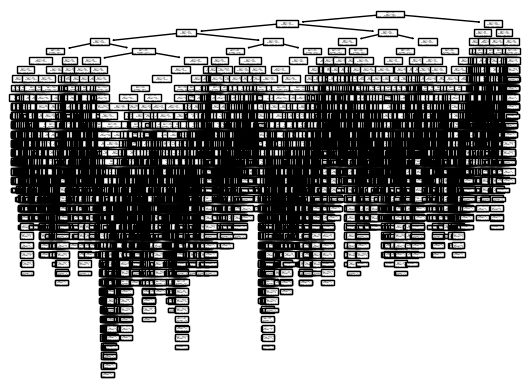

In [12]:
tree.plot_tree(clf)

In [ ]:
clf = svm.SVC()
scores = cross_val_score(clf, X, Y, cv=10)
#clf.fit(x_train,y_train)
#(clf.score(x_test,y_test))
print(scores, np.mean(scores))

In [16]:
clf = RandomForestClassifier(max_depth=2)
clf.fit(x_train,y_train)
print(clf.score(x_test,y_test))

0.7287737054643971
